# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = a*(x**2) + b*x + c
a = 1 # smile
b = 3 # lame
c = 74 # intersect

def f(x) : return a*(x**2) + b*x + c

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.50 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

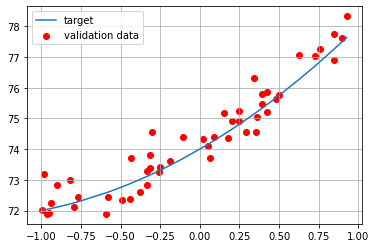

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [7]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(InputLayer(shape=(1,)))
model.add(Dense(5, activation='exponential'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='softsign'))
model.add(Dense(1, activation='linear'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [8]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [9]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=52, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3767.0054 - mse: 3767.0054 - val_loss: 201.5696 - val_mse: 201.5696
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.0794 - mse: 106.0794 - val_loss: 6.1626 - val_mse: 6.1626
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9810 - mse: 4.9810 - val_loss: 3.0142 - val_mse: 3.0142
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6552 - mse: 3.6552 - val_loss: 2.9599 - val_mse: 2.9599
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3742 - mse: 3.3742 - val_loss: 2.9489 - val_mse: 2.9489
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5387 - mse: 3.5387 - val_loss: 2.9484 - val_mse: 2.9484
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4995 - mse: 3.4995 - val_loss: 2.9395 - val_mse: 2.9395
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3778 - mse: 3.3778 - val_loss: 2.9277 - val_mse: 2.9277
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

Epoch 55/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2455 - mse: 0.2455 - val_loss: 0.2821 - val_mse: 0.2821
Epoch 56/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2661 - mse: 0.2661 - val_loss: 0.3104 - val_mse: 0.3104
Epoch 57/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2610 - mse: 0.2610 - val_loss: 0.2791 - val_mse: 0.2791
Epoch 58/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2388 - mse: 0.2388 - val_loss: 0.3165 - val_mse: 0.3165
Epoch 59/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2470 - mse: 0.2470 - val_loss: 0.2620 - val_mse: 0.2620
Epoch 60/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2573 - mse: 0.2573 - val_loss: 0.2527 - val_mse: 0.2527
Epoch 61/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2692 - mse: 0.2692 - val_loss: 0.2653 - val_mse: 0.2653
Epoch 62/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2574 - mse: 0.2574 - val_loss: 0.2879 - val_mse: 0.2879
Epoch 63/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [10]:
# return weights and biases
model.get_weights()

[array([[ 0.32231334,  0.42829725,  1.3828806 ,  0.43665305, -0.39893875]],
       dtype=float32),
 array([-0.42099112, -0.8002946 ,  0.40420163,  0.12863465,  0.5994781 ],
       dtype=float32),
 array([[ 0.5709705 , -0.39664292, -0.02309372,  0.17401516,  0.43323985,
         -0.5717832 , -0.10846241, -0.26057705,  1.2110709 ,  0.44504213],
        [ 0.2195873 ,  0.72344035, -0.09465308, -0.31383884, -0.54773134,
         -0.54221684, -0.43924037, -0.02283366, -0.04203545, -0.04167128],
        [ 0.13330452,  0.44351235, -1.057833  , -0.22322027, -0.3740938 ,
         -0.39199346, -0.39092985, -0.42381513,  0.88339615, -0.4693002 ],
        [ 0.24920538, -0.537372  , -0.5525551 , -0.78092283, -0.4206241 ,
         -0.43211243,  0.16309544, -0.05289011,  0.75539994, -0.55345863],
        [-0.59008753, -0.71432686, -0.77534693, -0.2560554 , -0.10302507,
         -0.32743776,  1.0385761 , -0.8478665 ,  0.23849615, -0.76221615]],
       dtype=float32),
 array([ 0.05353211, -0.07893611, -

In [11]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2936 - mse: 0.2936 

Test loss: 0.289791464805603
Test accuracy: 0.289791464805603


In [12]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mse: 0.0081 

Test loss: 0.008104464039206505
Test accuracy: 0.008104464039206505


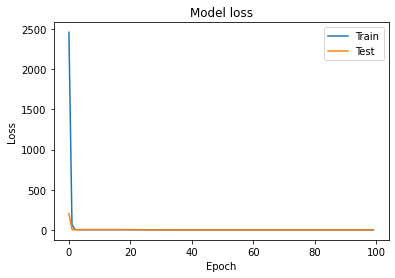

In [13]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


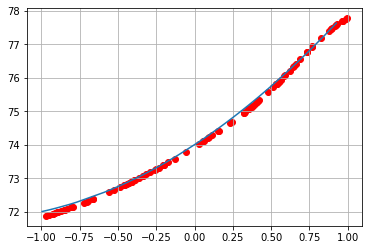

In [14]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>